In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

X.shape, y.shape

((50000, 15), (50000,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [4]:
#Initialize weights

In [5]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    return np.zeros_like(row_vector),0#w,b

In [6]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [7]:
dim=X_train[0] 
w,b = initialize_weights(dim)


In [8]:
#Compute sigmoid
#𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑧)=1/(1+𝑒𝑥𝑝(−𝑧))
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1/(1+math.exp(-z))

In [9]:
#Compute loss
#𝑙𝑜𝑔𝑙𝑜𝑠𝑠=−1∗1𝑛Σ𝑓𝑜𝑟𝑒𝑎𝑐ℎ𝑌𝑡,𝑌𝑝𝑟𝑒𝑑(𝑌𝑡𝑙𝑜𝑔10(𝑌𝑝𝑟𝑒𝑑)+(1−𝑌𝑡)𝑙𝑜𝑔10(1−𝑌𝑝𝑟𝑒𝑑))
def logloss(y_true,y_pred):
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    
    loss = (-1)*(1/y_true.size)*np.sum(y_true*np.log10(y_pred)+(1-y_true)*np.log10(1-y_pred))
    return loss

In [10]:
#Compute gradient w.r.to 'w'
#𝑑𝑤(𝑡)=𝑥𝑛(𝑦𝑛−σ((𝑤(𝑡))𝑇𝑥𝑛+𝑏𝑡))−λ𝑁𝑤(𝑡) 
#make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=x*(y-sigmoid(np.dot(w,x)+b))-(alpha/N)*w
    return dw

In [11]:
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)

In [12]:
#Compute gradient w.r.to 'b'
#𝑑𝑏(𝑡)=𝑦𝑛−σ((𝑤(𝑡))𝑇𝑥𝑛+𝑏𝑡)

#sb should be a scalar value
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db=y-sigmoid(np.dot(w,x)+b)
     return db

In [13]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [14]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
        
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    #write your code to perform SGD
    
    while(1):
        for i in range(y_train.size):
            dw=gradient_dw(X_train[i],y_train[i],w,b,alpha,y_train.size)
            db=gradient_db(X_train[i],y_train[i],w,b)
            w=w+alpha*dw
            b=b+alpha*db
        y_train_pred=pred(w,b,X_train)
        loss_train=logloss(y_train,y_train_pred)
        
        y_test_pred=pred(w,b,X_test)
        loss_test=logloss(y_test,y_test_pred)
        
        
            
        train_loss.append(loss_train)
        test_loss.append(loss_test)
        
        if(len(train_loss) > 1 and abs(train_loss[-1]-train_loss[-2])<=0.00001):
            break
        
    return w,b,train_loss,test_loss

In [15]:
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

3


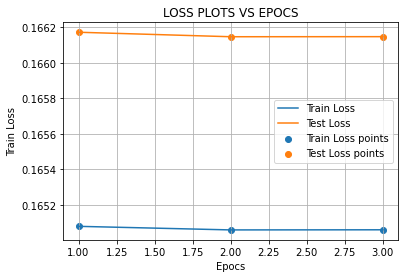

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(train_loss)+1), train_loss, label='Train Loss')
plt.plot(range(1,len(test_loss)+1), test_loss, label='Test Loss')

plt.scatter(range(1,len(train_loss)+1), train_loss, label='Train Loss points')
plt.scatter(range(1,len(test_loss)+1), test_loss, label='Test Loss points')
print(len(train_loss))
plt.legend()
plt.xlabel("Epocs")
plt.ylabel("Train Loss")
plt.title("LOSS PLOTS VS EPOCS")
plt.grid()
plt.show()

In [17]:
def predict(w,b,X):
    N=len(X)
    predict = []
    for i in range(N):
        if sigmoid(np.dot(X[i],w)+b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

print(1-np.sum(y_train-predict(w,b,X_train))/len(X_train))
print(1-np.sum(y_test-predict(w,b,X_test))/len(X_test))

0.9466133333333333
0.94456
